# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#observations
1. as expected the closer to the equator the hotter the max temp was
2. the Linear regression on the scatter plot showed a strong correlation between the max temp and proximity to the equator 
3.there was not a very strong correlation between cloudiness and latitude, only that it was less cloudy closer to the equator but once away from the equator there was not much consitancy. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)


6b5f442280b47ab662d05bcf7080b11a


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

111

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

print(query_url)

lon=[]
lat=[]
temp=[]
city_list=[]
temp_max=[]
cloudiness=[]
wind_speed=[]
humidity=[]


weather_response = requests.get(query_url)




weather_json = weather_response.json()




for city in cities:
   
    try:
        response = requests.get(query_url + city).json()
        
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp"])
        city_list.append(city)
        print(city + " Found")
    except:
        print(city + " not found")
        

http://api.openweathermap.org/data/2.5/weather?appid=6b5f442280b47ab662d05bcf7080b11a&units=imperial&q=
cabo san lucas Found
busselton Found
adrar Found
ribeira grande Found
amderma not found
avarua Found
portland Found
ushuaia Found
albany Found
tongzi Found
punta arenas Found
severo-kurilsk Found
eldikan not found
ucluelet Found
samalaeulu not found
malwan not found
ponta delgada Found
mys shmidta not found
russell Found
aklavik Found
suslovo Found
new norfolk Found
qaanaaq Found
bonthe Found
progreso Found
hermanus Found
ahuimanu Found
vysokogornyy Found
cherskiy Found
taolanaro not found
rikitea Found
morondava Found
petropavlovka Found
ayorou Found
tsihombe not found
tasiilaq Found
longyearbyen Found
ekhabi Found
chokurdakh Found
fairbanks Found
yulara Found
richards bay Found
hobart Found
castro Found
xichang Found
vaitupu not found
oussouye Found
tuatapere Found
norman wells Found
bubaque Found
nikolskoye Found
iqaluit Found
yilan Found
mahebourg Found
vinh long Found
cockburn t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(len(city_list))
print(len(wind_speed))
print(len(temp))
city_df=pd.DataFrame({"city name": city_list,
                     "lat": lat,
                     "temp": temp,
                     "humidity":humidity,
                     "temp max":temp_max,
                     "cloudiness":cloudiness,
                     "wind speed": wind_speed,
                      "lon": lon
                     })

city_df.head()
city_df.to_csv(output_data_file)
city_df.head()

100
100
100


,city name,lat,temp,humidity,temp max,cloudiness,wind speed,lon
0,cabo san lucas,22.89,61.00,87,63.00,5,14.99,-109.91
1,busselton,-33.65,60.21,58,64.00,100,10.51,115.33
2,adrar,20.50,82.96,25,82.96,80,15.77,-10.07
3,ribeira grande,38.52,64.40,93,64.40,75,11.41,-28.70
4,avarua,-21.21,75.20,83,75.20,0,3.36,-159.78


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humidity_df=city_df.loc[city_df["humidity"]>100]
humidity_df

,city name,lat,temp,humidity,temp max,cloudiness,wind speed,lon


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame
humidity=city_df["humidity"]
humidity.head()

# Export the City_Data into a csv


0    87
1    58
2    25
3    93
4    83
Name: humidity, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

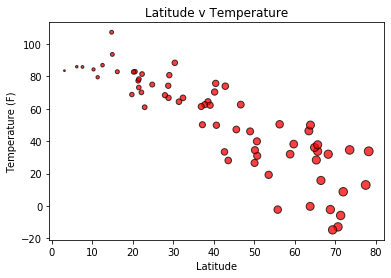

In [42]:
x_limit = 100
x_axis=city_df["lat"]
y_axis=city_df["temp"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latitude v Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")


In [43]:
plt.savefig("../Images/latVtemp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

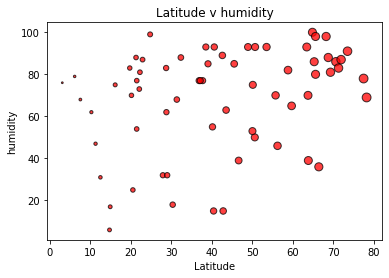

In [44]:
x_limit = 100
x_axis=city_df["lat"]
y_axis=city_df["humidity"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latitude v humidity")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.savefig("../Images/latVhumidity.png")

## Latitude vs. Cloudiness Plot

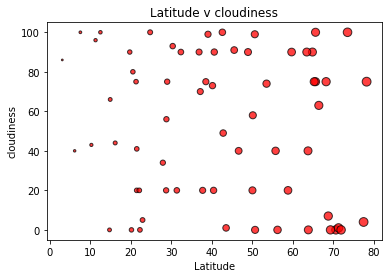

In [45]:
x_limit = 100
x_axis=city_df["lat"]
y_axis=city_df["cloudiness"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latitude v cloudiness")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")

plt.savefig("../Images/latVcloudiness.png")

## Latitude vs. Wind Speed Plot

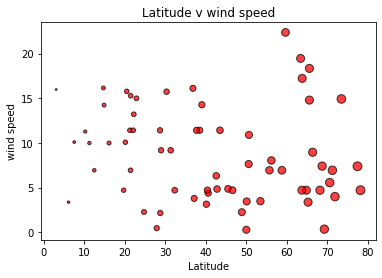

In [46]:
x_limit = 100
x_axis=city_df["lat"]
y_axis=city_df["wind speed"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latitude v wind speed")
plt.ylabel("wind speed")
plt.xlabel("Latitude")

plt.savefig("../Images/latVwind.png")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [32]:
# Create Northern and Southern Hemisphere DataFrames
#n_hem_df=city_df.loc[city_df[(["humidity"] < 0) & (["humidity"] == 0)]]
n_hem_df=city_df.loc[city_df["lat"]>-1]
s_hem_df=city_df.loc[city_df["lat"]<0]
n_hem_df
s_hem_df.head()

,city name,lat,temp,humidity,temp max,cloudiness,wind speed,lon
1,busselton,-33.65,60.21,58,64.0,100,10.51,115.33
4,avarua,-21.21,75.20,83,75.2,0,3.36,-159.78
6,ushuaia,-54.80,45.86,34,50.0,75,17.22,-68.30
9,punta arenas,-53.15,39.85,80,41.0,8,13.87,-70.92
16,new norfolk,-42.78,45.66,82,48.0,89,3.71,147.06


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

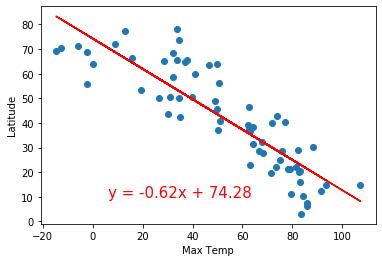

In [30]:
#.loc where lat is greater then or = 0 (creating a new dataframe and one for southern)

# x_limit = 100
# y_axis=n_hem_df["lat"]
# x_axis=n_hem_df["temp max"]


# plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)
# plt.title("Latitude v Temperature")
# plt.ylabel("Temperature (F)")
# plt.xlabel("Latitude")



x_values = n_hem_df["temp max"]
y_values = n_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

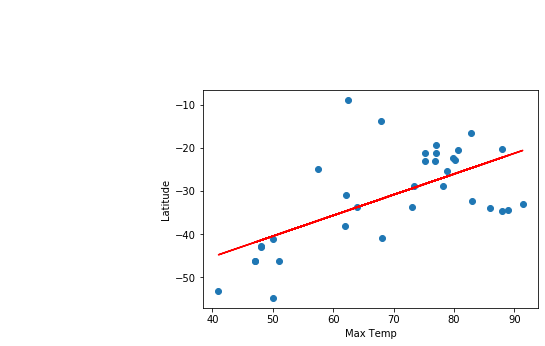

In [31]:
x_values = s_hem_df["temp max"]
y_values = s_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

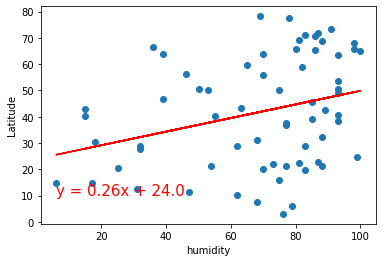

In [33]:
x_values = n_hem_df["humidity"]
y_values = n_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

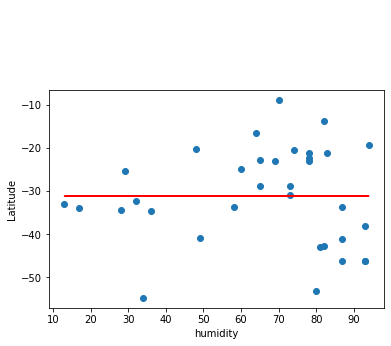

In [34]:
x_values = s_hem_df["humidity"]
y_values = s_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('humidity')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

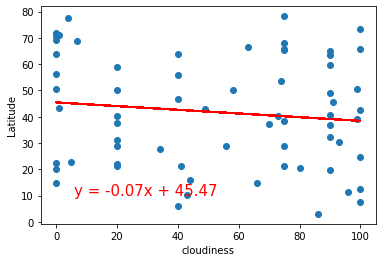

In [35]:
x_values = n_hem_df["cloudiness"]
y_values = n_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

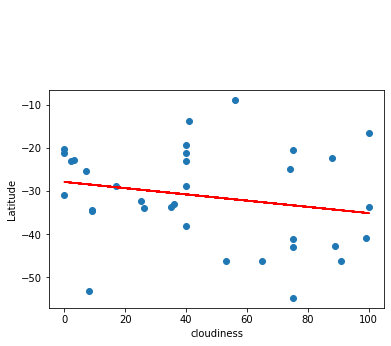

In [38]:
x_values = s_hem_df["cloudiness"]
y_values = s_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

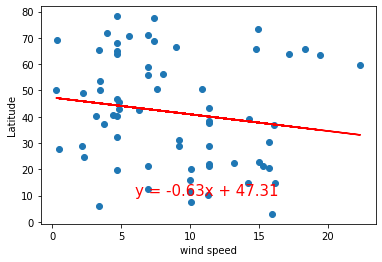

In [37]:
x_values = n_hem_df["wind speed"]
y_values = n_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('wind speed')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

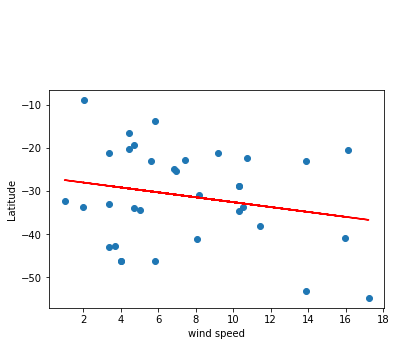

In [39]:
x_values = s_hem_df["wind speed"]
y_values = s_hem_df["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('wind speed')
plt.ylabel('Latitude')
plt.show()